# Setup


In [ ]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.preprocessing import OneHotEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor


In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
# Import file
from google.colab import files
uploaded = files.upload()

import io
train = pd.read_csv(io.BytesIO(uploaded['train_asia.csv']))
test = pd.read_csv(io.BytesIO(uploaded['test_asia.csv']))

Saving test_asia.csv to test_asia (1).csv
Saving train_asia.csv to train_asia (1).csv


In [ ]:
train = train.drop(['2000', '2010', '2015', '2019'], axis=1)
test = test.drop(['2000', '2010', '2015', '2019'], axis=1)

In [ ]:
train.head()

Life Expectancy at birth   BMI  Alcohol  gender_dummy  2000  2010  2015  \
0                     77.56  24.5     0.52             0     0     0     1   
1                     66.57  20.3     0.35             1     1     0     0   
2                     73.43  27.8     0.78             1     0     0     1   
3                     75.34  25.2     2.37             1     0     1     0   
4                     71.53  26.7    16.75             0     1     0     0   

   2019  Infectious_and_parasitic_diseases  Respiratory_infectious  ...  \
0     0                           0.021432                0.016670  ...   
1     0                          25.141589                6.866042  ...   
2     0                           0.722083                0.863794  ...   
3     0                           0.013081                0.039721  ...   
4     0                           0.012081                0.051971  ...   

   unintentional_injuries  intentional_injuries  mental_substance_disorders  \
0                0.037146              0.018775                    0.002045   
1                4.277939              0.627095                    0.029103   
2                0.696641              0.149374                    0.063723   
3                0.038320              0.018554                    0.000859   
4                0.221756              0.025140                    0.013749   

   sense_organ  musculoskeletal  congenital  sudden_infant_death_syndrome  \
0     0.001205         0.004010    0.010017                      0.000000   
1     0.000000         0.089560    1.524466                      0.083323   
2     0.000000         0.011054    0.295432                      0.011695   
3     0.000000         0.007775    0.033830                      0.001544   
4     0.000000         0.008273    0.013163                      0.003147   

   skin_diseases  diabetes_mellitus  oral_conditions  
0       0.000000           0.024621         0.004624  
1       0.004418           0.472618         0.000000  
2       0.006583           1.167620         0.000000  
3       0.014138           0.209076         0.000000  
4       0.007796           0.180246         0.000000  

[5 rows x 29 columns]

# Asia

In [ ]:
allcols = np.array(train.columns)

In [ ]:
X_train = train[allcols[1:]]
y_train = train[allcols[0]]

X_test = test[allcols[1:]]
y_test = test[allcols[0]]

In [ ]:
def OSR2(model, X_test, y_test, y_train):
    
    y_pred = model.predict(X_test)
    SSE = np.sum((y_test - y_pred)**2)
    SST = np.sum((y_test - np.mean(y_train))**2)
                 
    return (1 - SSE/SST)

### Linear Regression

In [ ]:
train.corr().style.background_gradient(cmap='coolwarm')

In [ ]:
X_train_linreg = sm.add_constant(X_train)
X_test_linreg = sm.add_constant(X_test)

linreg = sm.OLS(y_train, X_train_linreg).fit()
print(linreg.summary())

                               OLS Regression Results                               
Dep. Variable:     Life Expectancy at birth   R-squared:                       0.600
Model:                                  OLS   Adj. R-squared:                  0.554
Method:                       Least Squares   F-statistic:                     13.07
Date:                      Sat, 06 May 2023   Prob (F-statistic):           2.65e-33
Time:                              18:39:22   Log-Likelihood:                -735.79
No. Observations:                       263   AIC:                             1528.
Df Residuals:                           235   BIC:                             1628.
Df Model:                                27                                         
Covariance Type:                  nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------

In [ ]:
print('OSR2:', OSR2(linreg, X_test_linreg, y_test, y_train))

OSR2: 0.40647245663069764


### CART

In [ ]:
dtr = DecisionTreeRegressor(min_samples_split=10, 
                            ccp_alpha=0.02,
                            random_state = 88)
dtr = dtr.fit(X_train, y_train)

In [ ]:
d_tree_cv = DecisionTreeRegressor(ccp_alpha=0, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88)
d_tree_cv.fit(X_train, y_train)

y_pred = d_tree_cv.predict(X_test)

Node count = 41


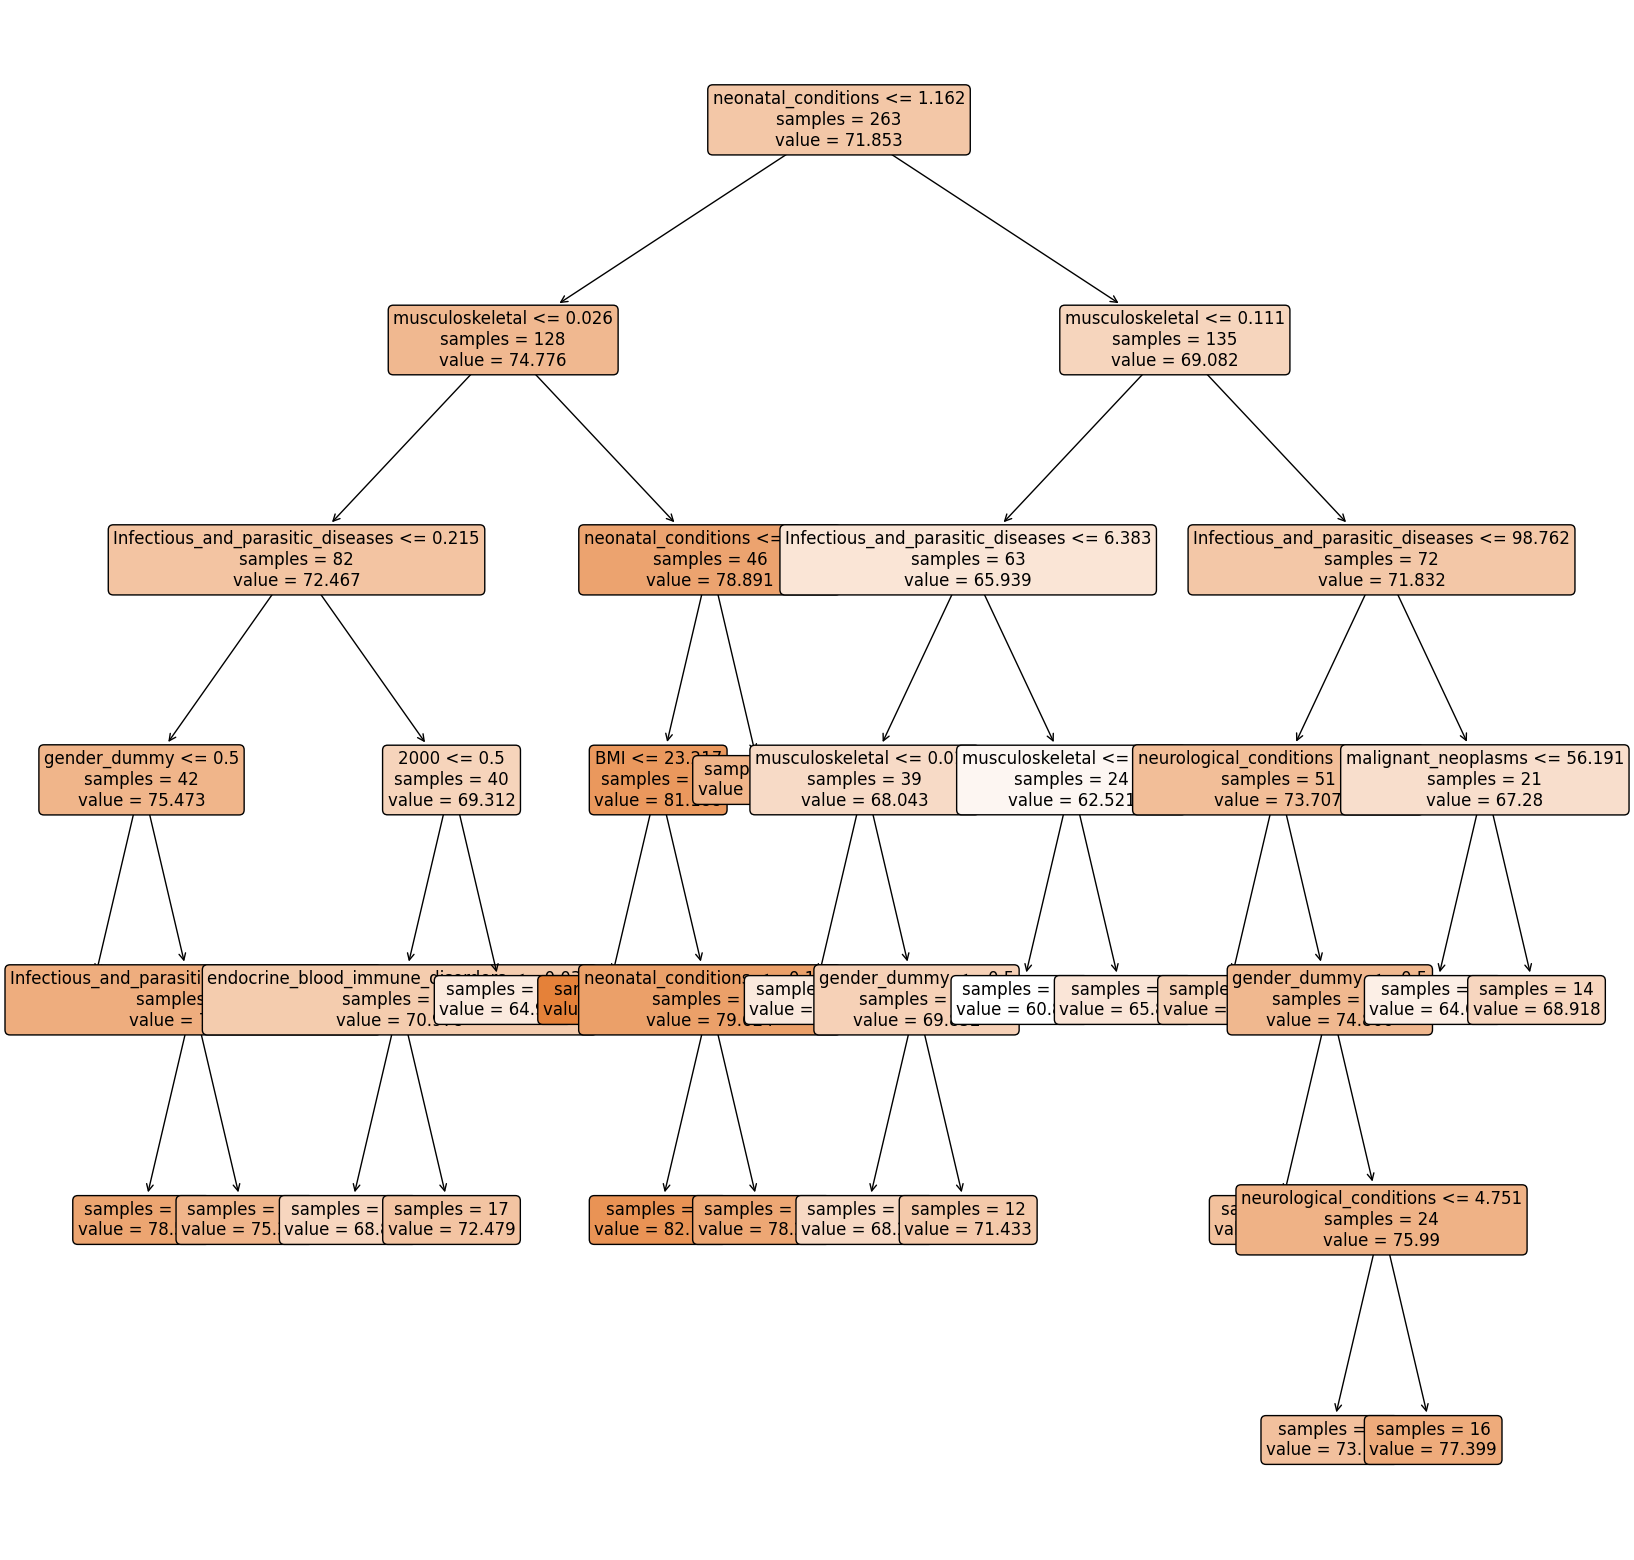

In [ ]:
print('Node count =', d_tree_cv.tree_.node_count)
plt.figure(figsize=(20,20))
plot_tree(d_tree_cv, 
          feature_names=X_train.columns, 
          class_names=['0','1'], 
          filled=True,
          impurity=False,
          rounded=True,
          fontsize=12)
plt.show()

In [ ]:
importance = d_tree_cv.feature_importances_
len(importance)

28

In [ ]:
features = d_tree_cv.feature_names_in_

In [ ]:
for x, y in zip(features, importance):
  print(x, y)

BMI 0.02234751351364341
Alcohol 0.0
gender_dummy 0.03147129042013342
2000 0.03465636027216449
2010 0.0
2015 0.0
2019 0.0
Infectious_and_parasitic_diseases 0.22547128797642246
Respiratory_infectious 0.0
neonatal_conditions 0.30146488663338233
nutritional_deficiencies 0.0
endocrine_blood_immune_disorders 0.01096851398648821
cardiovascular_disease 0.0
respiratory_diseases 0.0
digestive_diseases 0.0
genitourinary_diseases 0.0
malignant_neoplasms 0.01334703326163817
neurological_conditions 0.037634767474282745
unintentional_injuries 0.0
intentional_injuries 0.0
mental_substance_disorders 0.0
sense_organ 0.0
musculoskeletal 0.3226383464618448
congenital 0.0
sudden_infant_death_syndrome 0.0
skin_diseases 0.0
diabetes_mellitus 0.0
oral_conditions 0.0


In [ ]:
def importance_plot(tree, X_train):
    
    feature_importance = tree.feature_importances_ # get the importance of each feature
    
    #relative feature importance
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    
    # Save to a dataframe with two columns: One holding the names of the features, 
    # and one holding the associated relative importance of each feature.
    feat_df = pd.DataFrame({'feature':X_train.columns, 'importance':feature_importance})
    # Sort feat_df in order of importance
    feat_df = feat_df.sort_values(by='importance', ascending=True)
    
    # Bar plot 
    plt.figure(figsize=(8, 7.5))
    plt.barh(width=feat_df.importance, y=feat_df.feature)
    plt.xlabel('Relative feature importance');


In [ ]:
print('OSR2:', OSR2(d_tree_cv, X_test, y_test, y_train))

OSR2: 0.540625927168688


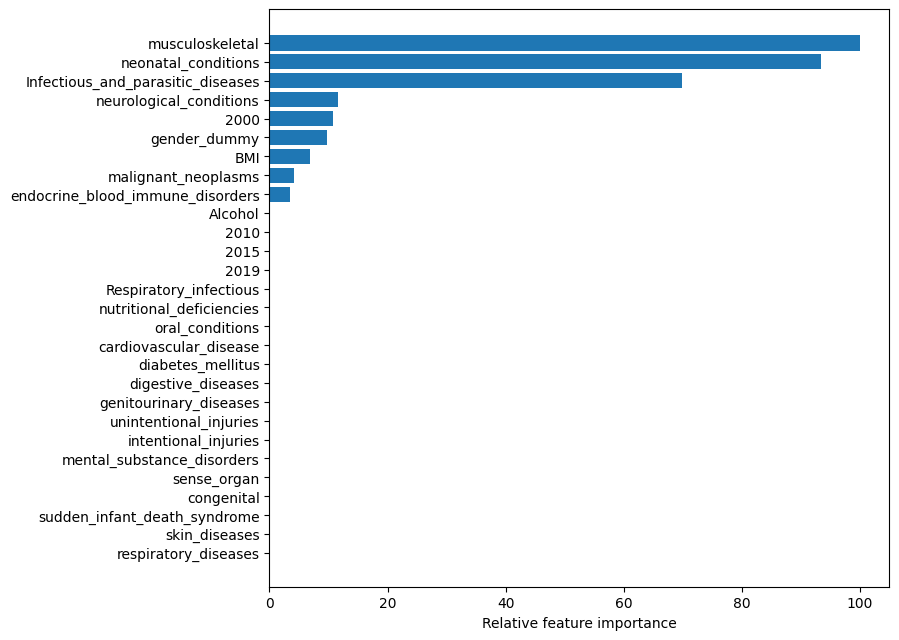

In [ ]:
importance_plot(d_tree_cv, X_train)

### Random Forest

In [ ]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

print('OSR2:', OSR2(rf, X_test, y_test, y_train))

OSR2: 0.8426283173297445


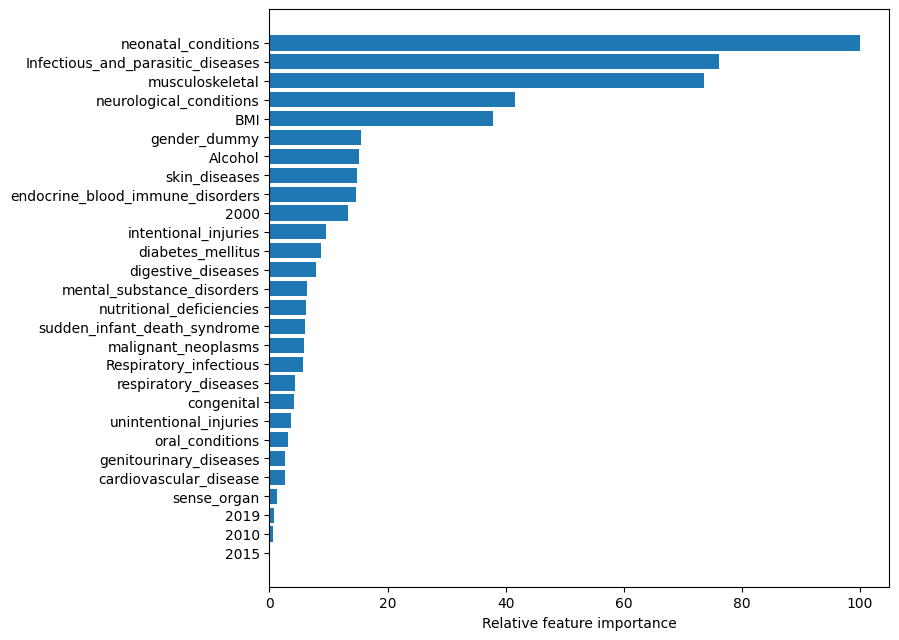

In [ ]:
importance_plot(rf, X_train)

In [ ]:
importances = pd.DataFrame(index=d_tree_cv.feature_names_in_)
importances['CART'] = d_tree_cv.feature_importances_
importances['RF'] = rf.feature_importances_

importances.sort_values(by=['RF'], ascending=False)

CART        RF
neonatal_conditions                0.301465  0.207472
Infectious_and_parasitic_diseases  0.225471  0.157805
musculoskeletal                    0.322638  0.152510
neurological_conditions            0.037635  0.086284
BMI                                0.022348  0.078442
gender_dummy                       0.031471  0.032227
Alcohol                            0.000000  0.031432
skin_diseases                      0.000000  0.030698
endocrine_blood_immune_disorders   0.010969  0.030568
2000                               0.034656  0.027461
intentional_injuries               0.000000  0.019775
diabetes_mellitus                  0.000000  0.017995
digestive_diseases                 0.000000  0.016280
mental_substance_disorders         0.000000  0.013117
nutritional_deficiencies           0.000000  0.012753
sudden_infant_death_syndrome       0.000000  0.012529
malignant_neoplasms                0.013347  0.012270
Respiratory_infectious             0.000000  0.011908
respiratory_diseases               0.000000  0.008900
congenital                         0.000000  0.008613
unintentional_injuries             0.000000  0.007406
oral_conditions                    0.000000  0.006657
genitourinary_diseases             0.000000  0.005614
cardiovascular_disease             0.000000  0.005482
sense_organ                        0.000000  0.002662
2019                               0.000000  0.001611
2010                               0.000000  0.001193
2015                               0.000000  0.000338